In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

'/content/drive/Shareddrives/機器學習/AOI data'

In [3]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 29.0 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [5]:
train = pd.read_csv("AOI_train.csv")
train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [6]:
data_path = "AOI_Train_Image" #路徑掛載到存放圖片的資料夾路徑

image shape: (512, 512, 3)
data type: uint8
min: 77, max: 255


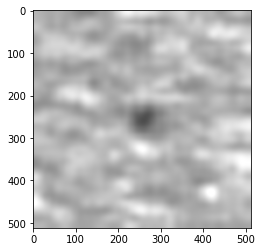

In [7]:
# 挑選一張切割前的原圖
img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [8]:
# 設置切割參數
crop = []
point = [0, 128, 256, 384, 512]
for i in range(4):
  for j in range(4):
    crop.append([point[i]]+[point[i+1]]+[point[j]]+[point[j+1]])
crop

[[0, 128, 0, 128],
 [0, 128, 128, 256],
 [0, 128, 256, 384],
 [0, 128, 384, 512],
 [128, 256, 0, 128],
 [128, 256, 128, 256],
 [128, 256, 256, 384],
 [128, 256, 384, 512],
 [256, 384, 0, 128],
 [256, 384, 128, 256],
 [256, 384, 256, 384],
 [256, 384, 384, 512],
 [384, 512, 0, 128],
 [384, 512, 128, 256],
 [384, 512, 256, 384],
 [384, 512, 384, 512]]

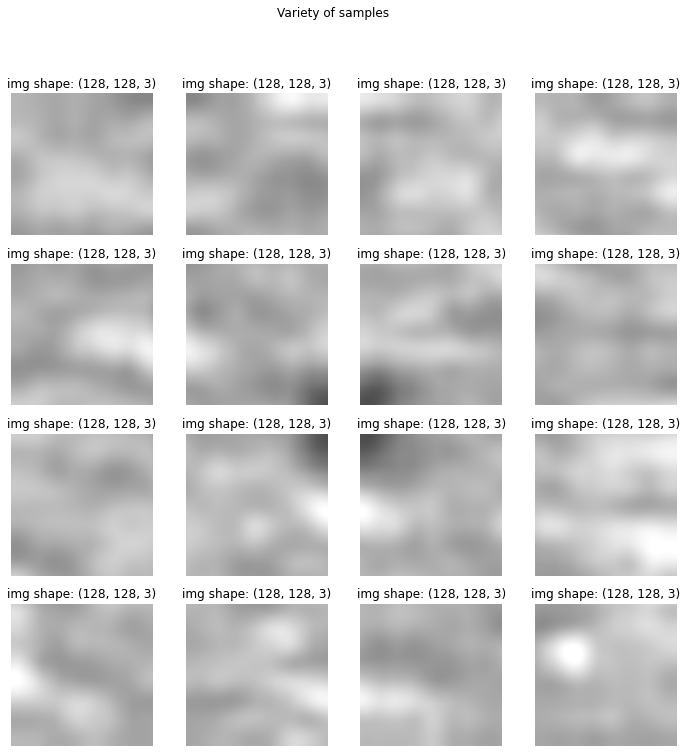

In [9]:
# 切割成4*4個子圖的效果
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

In [10]:
import statistics
a=img.reshape(-1)

In [11]:
# 將4*4個子圖的特徵合併成一個dataframe
df_hara = pd.DataFrame()
for i in range(16):
  img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  df_hara = df_hara.append(list(mahotas.features.haralick(image)))

df_hara

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.006934,0.543922,0.999073,293.401111,0.759781,366.732160,1173.060521,6.937713,7.537807,0.002188,1.142792,-0.740322,0.999929
1,0.004307,1.610081,0.997231,290.771721,0.586619,367.083576,1161.476802,6.956771,8.258940,0.001591,1.701097,-0.618233,0.999691
2,0.004804,1.394808,0.997603,290.913624,0.607125,366.994341,1162.259687,6.939352,8.137916,0.001602,1.623897,-0.638768,0.999759
3,0.003866,1.941162,0.996663,290.839661,0.518705,367.080848,1161.417482,6.960523,8.328629,0.001504,1.726071,-0.606593,0.999645
0,0.005322,0.699803,0.999213,444.536885,0.724508,350.549336,1777.447738,7.271909,8.011990,0.001781,1.268074,-0.728066,0.999948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.004062,2.543431,0.996737,389.700734,0.543675,354.798872,1556.259504,7.140509,8.643404,0.001179,1.987611,-0.595374,0.999671
0,0.005994,1.128999,0.998734,445.740079,0.713867,375.536848,1781.831319,7.218666,8.095554,0.001571,1.529090,-0.708246,0.999930
1,0.004117,3.208754,0.996395,444.995082,0.592983,375.754852,1776.771572,7.233514,8.743981,0.001213,2.018663,-0.604538,0.999744
2,0.004575,2.158772,0.997574,444.848329,0.619926,375.605007,1777.234544,7.229369,8.566774,0.001329,1.840051,-0.632781,0.999820


In [55]:
# 將4*4個子圖的特徵合併成一個dataframe的一個row
oneimage = list()
for i in range(64):
  oneimage = oneimage + list(df_hara.iloc[i])

df_oneimage = pd.DataFrame([oneimage])
df_oneimage

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,0.006934,0.543922,0.999073,293.401111,0.759781,366.73216,1173.060521,6.937713,7.537807,0.002188,...,444.967414,0.564746,375.757518,1776.812862,7.240555,8.763949,0.001161,2.03723,-0.60134,0.999733


In [56]:
# 計算test圖片的4*4個子圖之特徵之特徵m,v,s,k

df_crop44 = pd.DataFrame()

test = [320,321,322]

#for i in range(len(train)):
for j in test:

  # 將4*4個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(16):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的變成一個row
  oneimage = list()
  for i in range(64):
    oneimage = oneimage + list(df_hara.iloc[i])
  df_oneimage = pd.DataFrame([oneimage])

  # 一張照片的13*4個特徵為df_crop44的的一個row
  df_crop44 = pd.concat([df_crop44, df_oneimage])

df_crop44

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,0.006934,0.543922,0.999073,293.401111,0.759781,366.732160,1173.060521,6.937713,7.537807,0.002188,...,444.967414,0.564746,375.757518,1776.812862,7.240555,8.763949,0.001161,2.037230,-0.601340,0.999733
0,0.002774,21.063238,0.777655,47.366168,0.234742,348.680610,168.401435,5.727252,8.937136,0.000540,...,895.798615,0.204441,425.328973,3543.628896,7.006190,10.399398,0.000321,3.777951,-0.281005,0.983172
0,0.003154,17.210384,0.805280,44.192648,0.254462,316.023868,159.560208,5.688393,8.756258,0.000635,...,39.367808,0.219801,321.158162,133.020617,5.561568,8.881506,0.000541,3.433722,-0.105198,0.791836


In [57]:
# 計算所有圖片的4*4個子圖之特徵
df_crop44 = pd.DataFrame()

for j in range(len(train)):

  # 將4*4個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(16):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的變成一個row
  oneimage = list()
  for i in range(64):
    oneimage = oneimage + list(df_hara.iloc[i])
  df_oneimage = pd.DataFrame([oneimage])

  # 一張照片的13*4個特徵為df_crop44的的一個row
  df_crop44 = pd.concat([df_crop44, df_oneimage])

df_crop44

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,0.000286,510.617741,0.287959,358.559010,0.055939,352.767470,923.618297,6.935510,12.160087,0.000083,...,370.414392,0.046500,335.788270,718.696010,6.755028,12.257176,0.000065,5.843806,-0.042300,0.641257
0,0.000799,38.876230,0.945449,356.326432,0.184361,345.881029,1386.429497,7.206104,10.748640,0.000329,...,298.305132,0.122101,353.792548,1091.157162,7.042116,11.232108,0.000202,4.421342,-0.161376,0.927781
0,0.007658,2.019254,0.981414,54.321047,0.561162,335.693590,215.264934,5.885525,7.423657,0.001631,...,51.370748,0.452519,333.140368,201.754120,5.815948,7.792220,0.001275,2.197922,-0.388215,0.988215
0,0.002259,4.151513,0.997156,729.984402,0.439546,396.617188,2915.786095,7.542161,9.439876,0.000877,...,456.298400,0.455890,425.148862,1821.157888,7.058648,8.885457,0.000895,2.273554,-0.544819,0.999355
0,0.005953,1.231299,0.996310,166.828960,0.629798,425.587229,666.084542,6.691898,7.855819,0.001470,...,305.163587,0.503116,404.299833,1217.885548,7.015947,8.716012,0.001131,2.025205,-0.554170,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000689,42.423597,0.977355,936.726322,0.186033,402.175320,3704.481689,7.487904,11.043436,0.000314,...,114.621302,0.150278,311.835576,395.035523,6.350323,10.273165,0.000319,4.089256,-0.117799,0.850647
0,0.000381,296.514087,0.493861,292.917793,0.071817,327.381459,875.157085,6.883991,11.762408,0.000115,...,191.429829,0.072453,326.549445,470.122439,6.459454,11.387033,0.000122,5.166630,-0.034896,0.576747
0,0.000593,55.525160,0.930516,399.551158,0.149240,355.095903,1542.679471,7.303174,11.107393,0.000271,...,409.786147,0.122464,351.530659,1542.798505,7.310738,11.442676,0.000209,4.375703,-0.199718,0.959709
0,0.001744,11.930118,0.968209,187.636027,0.291251,351.813238,738.613988,6.783476,9.567542,0.000648,...,401.625643,0.214721,352.056792,1578.527620,7.293254,10.603093,0.000403,3.523213,-0.321163,0.991310


In [58]:
# column name
col_names = []
for i in range(832):
  col_names.append("X"+str(i))
df_crop44.columns = col_names
df_crop44

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X822,X823,X824,X825,X826,X827,X828,X829,X830,X831
0,0.000286,510.617741,0.287959,358.559010,0.055939,352.767470,923.618297,6.935510,12.160087,0.000083,...,370.414392,0.046500,335.788270,718.696010,6.755028,12.257176,0.000065,5.843806,-0.042300,0.641257
0,0.000799,38.876230,0.945449,356.326432,0.184361,345.881029,1386.429497,7.206104,10.748640,0.000329,...,298.305132,0.122101,353.792548,1091.157162,7.042116,11.232108,0.000202,4.421342,-0.161376,0.927781
0,0.007658,2.019254,0.981414,54.321047,0.561162,335.693590,215.264934,5.885525,7.423657,0.001631,...,51.370748,0.452519,333.140368,201.754120,5.815948,7.792220,0.001275,2.197922,-0.388215,0.988215
0,0.002259,4.151513,0.997156,729.984402,0.439546,396.617188,2915.786095,7.542161,9.439876,0.000877,...,456.298400,0.455890,425.148862,1821.157888,7.058648,8.885457,0.000895,2.273554,-0.544819,0.999355
0,0.005953,1.231299,0.996310,166.828960,0.629798,425.587229,666.084542,6.691898,7.855819,0.001470,...,305.163587,0.503116,404.299833,1217.885548,7.015947,8.716012,0.001131,2.025205,-0.554170,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000689,42.423597,0.977355,936.726322,0.186033,402.175320,3704.481689,7.487904,11.043436,0.000314,...,114.621302,0.150278,311.835576,395.035523,6.350323,10.273165,0.000319,4.089256,-0.117799,0.850647
0,0.000381,296.514087,0.493861,292.917793,0.071817,327.381459,875.157085,6.883991,11.762408,0.000115,...,191.429829,0.072453,326.549445,470.122439,6.459454,11.387033,0.000122,5.166630,-0.034896,0.576747
0,0.000593,55.525160,0.930516,399.551158,0.149240,355.095903,1542.679471,7.303174,11.107393,0.000271,...,409.786147,0.122464,351.530659,1542.798505,7.310738,11.442676,0.000209,4.375703,-0.199718,0.959709
0,0.001744,11.930118,0.968209,187.636027,0.291251,351.813238,738.613988,6.783476,9.567542,0.000648,...,401.625643,0.214721,352.056792,1578.527620,7.293254,10.603093,0.000403,3.523213,-0.321163,0.991310


In [59]:
# csv output
df_crop44_output = df_crop44.copy()

df_crop44_output.index = train["Label"].index
df_crop44_output = pd.concat([df_crop44_output,train["Label"]],axis = 1)
df_crop44_output

df_crop44_output.to_csv("/content/drive/Shareddrives/機器學習/第三次討論/crop csv/crop4x4all.csv")